DATA SCIENCE WITH PYTHON : Movielens Case Study
Background of Problem Statement :

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

Problem Objective :

Using the Exploratory Data Analysis technique to find out features affecting the ratings of any particular movie and to build a model to predict the movie ratings.

Dataset Description :

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

In [1]:
#importing pandas dataframe
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

#importing seaborn
import seaborn as sns

#importing matplolib
import matplotlib
import matplotlib.pyplot as plt

#Hold out method for splitting data
from sklearn.model_selection import train_test_split

#importing accuracy_score 
from sklearn.metrics import accuracy_score 

### Importing the three datasets

In [2]:
rating = ['UserID','MovieID','Rating','Timestamp']
user = ['UserID','Gender','Age','Occupation','Zip-code']
movie = ['MovieID','Title','Genres']

In [3]:
rating_df = pd.read_csv('C:/Users/vicky/Downloads/Data science with Python 1/Data science with Python 1/ratings.dat',header=None,delimiter='::',names=rating)
print(rating_df.head(10))
print("\nShape of Rating Data : ", rating_df.shape)

   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
5       1     1197       3  978302268
6       1     1287       5  978302039
7       1     2804       5  978300719
8       1      594       4  978302268
9       1      919       4  978301368

Shape of Rating Data :  (1000209, 4)


In [4]:
user_df = pd.read_csv('C:/Users/vicky/Downloads/Data science with Python 1/Data science with Python 1/users.dat',header=None,delimiter='::',names=user)
print(user_df.head(10))
print("\nShape of User Data : ", user_df.shape)

   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455
5       6      F   50           9    55117
6       7      M   35           1    06810
7       8      M   25          12    11413
8       9      M   25          17    61614
9      10      F   35           1    95370

Shape of User Data :  (6040, 5)


In [5]:
movies_df = pd.read_csv('C:/Users/vicky/Downloads/Data science with Python 1/Data science with Python 1/movies.dat',header=None,delimiter='::',names=movie)
print(movies_df.head(10))
print("\nShape of movie Data : ", movies_df.shape)

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
5        6                         Heat (1995)         Action|Crime|Thriller
6        7                      Sabrina (1995)                Comedy|Romance
7        8                 Tom and Huck (1995)          Adventure|Children's
8        9                 Sudden Death (1995)                        Action
9       10                    GoldenEye (1995)     Action|Adventure|Thriller

Shape of movie Data :  (3883, 3)


### Merging the three datasets

In [6]:
df = rating_df.merge(user_df,how='outer',on='UserID')
df = df.merge(movies_df,how='outer',on='MovieID')
df.head(10)

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1.0,1193,5.0,978300760.0,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2.0,1193,5.0,978298413.0,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12.0,1193,4.0,978220179.0,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15.0,1193,4.0,978199279.0,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17.0,1193,5.0,978158471.0,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18.0,1193,4.0,978156168.0,F,18.0,3.0,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19.0,1193,5.0,982730936.0,M,1.0,10.0,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24.0,1193,5.0,978136709.0,F,25.0,7.0,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28.0,1193,3.0,978125194.0,F,25.0,1.0,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33.0,1193,5.0,978557765.0,M,45.0,3.0,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000386 entries, 0 to 1000385
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   UserID      1000209 non-null  float64
 1   MovieID     1000386 non-null  int64  
 2   Rating      1000209 non-null  float64
 3   Timestamp   1000209 non-null  float64
 4   Gender      1000209 non-null  object 
 5   Age         1000209 non-null  float64
 6   Occupation  1000209 non-null  float64
 7   Zip-code    1000209 non-null  object 
 8   Title       1000386 non-null  object 
 9   Genres      1000386 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 84.0+ MB


In [8]:
df.shape

(1000386, 10)

In [9]:
df.isna().sum()

UserID        177
MovieID         0
Rating        177
Timestamp     177
Gender        177
Age           177
Occupation    177
Zip-code      177
Title           0
Genres          0
dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
df.isna().sum()

UserID        0
MovieID       0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
Title         0
Genres        0
dtype: int64

In [12]:
df.shape

(1000209, 10)

In [13]:
print(f"No. of unique MovieID: {df['MovieID'].nunique()}")
print(f"No. of unique MovieID: {df['Title'].nunique()}")

print(f"No. of unique UserID: {df['UserID'].nunique()}")
print(f"No. of unique Ratings: {df['Rating'].nunique()}")

No. of unique MovieID: 3706
No. of unique MovieID: 3706
No. of unique UserID: 6040
No. of unique Ratings: 5


In [14]:
def df_unique(X):
    for i in X.columns:
        print('Column : ',i,'\n',X[i].unique(), '\n Total unique values is: ', X[i].nunique())
        print('----------------------------------------------------------------------')
df_unique(df)

Column :  UserID 
 [1.000e+00 2.000e+00 1.200e+01 ... 2.982e+03 3.893e+03 4.211e+03] 
 Total unique values is:  6040
----------------------------------------------------------------------
Column :  MovieID 
 [1193  661  914 ... 2845 3607 2909] 
 Total unique values is:  3706
----------------------------------------------------------------------
Column :  Rating 
 [5. 4. 3. 2. 1.] 
 Total unique values is:  5
----------------------------------------------------------------------
Column :  Timestamp 
 [9.78300760e+08 9.78298413e+08 9.78220179e+08 ... 9.58846401e+08
 9.76029116e+08 9.57273353e+08] 
 Total unique values is:  458455
----------------------------------------------------------------------
Column :  Gender 
 ['F' 'M'] 
 Total unique values is:  2
----------------------------------------------------------------------
Column :  Age 
 [ 1. 56. 25. 50. 18. 45. 35.] 
 Total unique values is:  7
----------------------------------------------------------------------
Column :  Occupati

### Exploring the datasets using visual representations

##### User Age Distribution

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age', ylabel='Population'>

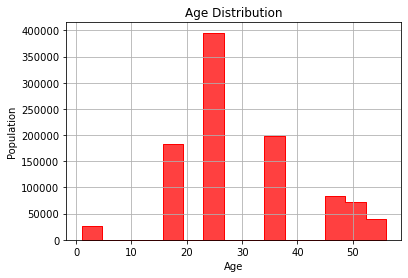

In [15]:
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Population')
plt.grid(True)
sns.histplot(df['Age'], bins = 15, color = 'r', element = 'step')

Adult-Aged people between 18-35 have a higher contribution than other segments

##### Visualizing User rating of the movie “Toy Story”


In [16]:
toystory95 = df[df["Title"]== "Toy Story (1995)"]
toystory95

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
41626,1.0,1,5.0,978824268.0,F,1.0,10.0,48067,Toy Story (1995),Animation|Children's|Comedy
41627,6.0,1,4.0,978237008.0,F,50.0,9.0,55117,Toy Story (1995),Animation|Children's|Comedy
41628,8.0,1,4.0,978233496.0,M,25.0,12.0,11413,Toy Story (1995),Animation|Children's|Comedy
41629,9.0,1,5.0,978225952.0,M,25.0,17.0,61614,Toy Story (1995),Animation|Children's|Comedy
41630,10.0,1,5.0,978226474.0,F,35.0,1.0,95370,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
43698,6022.0,1,5.0,956755763.0,M,25.0,17.0,57006,Toy Story (1995),Animation|Children's|Comedy
43699,6025.0,1,5.0,956812867.0,F,25.0,1.0,32607,Toy Story (1995),Animation|Children's|Comedy
43700,6032.0,1,4.0,956718127.0,M,45.0,7.0,55108,Toy Story (1995),Animation|Children's|Comedy
43701,6035.0,1,4.0,956712849.0,F,25.0,1.0,78734,Toy Story (1995),Animation|Children's|Comedy


In [17]:
toystory99 = df[df["Title"]== "Toy Story 2 (1999)"]
toystory99

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
55246,1.0,3114,4.0,978302174.0,F,1.0,10.0,48067,Toy Story 2 (1999),Animation|Children's|Comedy
55247,3.0,3114,3.0,978298103.0,M,25.0,15.0,55117,Toy Story 2 (1999),Animation|Children's|Comedy
55248,9.0,3114,4.0,978225952.0,M,25.0,17.0,61614,Toy Story 2 (1999),Animation|Children's|Comedy
55249,10.0,3114,4.0,978225759.0,F,35.0,1.0,95370,Toy Story 2 (1999),Animation|Children's|Comedy
55250,17.0,3114,5.0,978159386.0,M,50.0,1.0,95350,Toy Story 2 (1999),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
56826,6022.0,3114,5.0,956755741.0,M,25.0,17.0,57006,Toy Story 2 (1999),Animation|Children's|Comedy
56827,6024.0,3114,4.0,956749447.0,M,25.0,12.0,53705,Toy Story 2 (1999),Animation|Children's|Comedy
56828,6027.0,3114,4.0,956726766.0,M,18.0,4.0,20742,Toy Story 2 (1999),Animation|Children's|Comedy
56829,6036.0,3114,4.0,956710231.0,F,25.0,15.0,32603,Toy Story 2 (1999),Animation|Children's|Comedy


In [18]:
toystory = [toystory95,toystory99]

toystories = pd.concat(toystory)

In [19]:
toystories

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
41626,1.0,1,5.0,978824268.0,F,1.0,10.0,48067,Toy Story (1995),Animation|Children's|Comedy
41627,6.0,1,4.0,978237008.0,F,50.0,9.0,55117,Toy Story (1995),Animation|Children's|Comedy
41628,8.0,1,4.0,978233496.0,M,25.0,12.0,11413,Toy Story (1995),Animation|Children's|Comedy
41629,9.0,1,5.0,978225952.0,M,25.0,17.0,61614,Toy Story (1995),Animation|Children's|Comedy
41630,10.0,1,5.0,978226474.0,F,35.0,1.0,95370,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
56826,6022.0,3114,5.0,956755741.0,M,25.0,17.0,57006,Toy Story 2 (1999),Animation|Children's|Comedy
56827,6024.0,3114,4.0,956749447.0,M,25.0,12.0,53705,Toy Story 2 (1999),Animation|Children's|Comedy
56828,6027.0,3114,4.0,956726766.0,M,18.0,4.0,20742,Toy Story 2 (1999),Animation|Children's|Comedy
56829,6036.0,3114,4.0,956710231.0,F,25.0,15.0,32603,Toy Story 2 (1999),Animation|Children's|Comedy


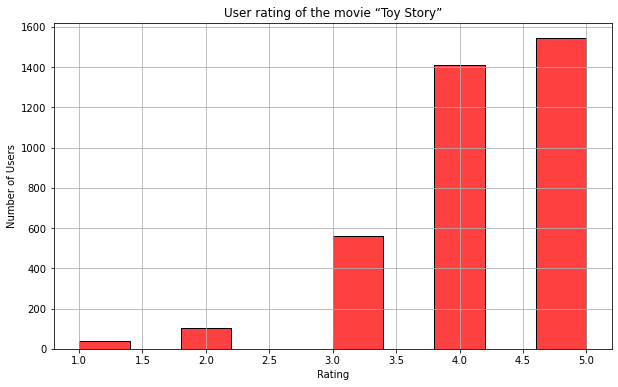

In [20]:
plt.figure(figsize = (10,6))
# toystories['Rating'].hist()
sns.histplot(toystories['Rating'], color = 'r', bins = 10)
plt.title('User rating of the movie “Toy Story”')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

Toystory movie has been liked by many and hence maximum range of viewers gave a higher rating between 4 to 5.

##### Top 25 movies by viewership rating

In [21]:
top_25_movies = df.groupby(["MovieID", "Title"]).Timestamp.count().sort_values(ascending=False)
top_25_movies.head(25)

MovieID  Title                                                
2858     American Beauty (1999)                                   3428
260      Star Wars: Episode IV - A New Hope (1977)                2991
1196     Star Wars: Episode V - The Empire Strikes Back (1980)    2990
1210     Star Wars: Episode VI - Return of the Jedi (1983)        2883
480      Jurassic Park (1993)                                     2672
2028     Saving Private Ryan (1998)                               2653
589      Terminator 2: Judgment Day (1991)                        2649
2571     Matrix, The (1999)                                       2590
1270     Back to the Future (1985)                                2583
593      Silence of the Lambs, The (1991)                         2578
1580     Men in Black (1997)                                      2538
1198     Raiders of the Lost Ark (1981)                           2514
608      Fargo (1996)                                             2513
2762     Sixth

These are the Top 25 Movies by viewership Rating

##### ratings for all the movies reviewed by for a particular user of user id = 2696

In [22]:
df[df['UserID']==2696]

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
24345,2696.0,1270,2.0,973308676.0,M,25.0,7.0,24210,Back to the Future (1985),Comedy|Sci-Fi
29848,2696.0,1097,3.0,973308690.0,M,25.0,7.0,24210,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi
244232,2696.0,1617,4.0,973308842.0,M,25.0,7.0,24210,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller
250014,2696.0,800,5.0,973308842.0,M,25.0,7.0,24210,Lone Star (1996),Drama|Mystery
273633,2696.0,3386,1.0,973308842.0,M,25.0,7.0,24210,JFK (1991),Drama|Mystery
277808,2696.0,3176,4.0,973308865.0,M,25.0,7.0,24210,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller
371178,2696.0,1711,4.0,973308904.0,M,25.0,7.0,24210,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery
377250,2696.0,1589,3.0,973308865.0,M,25.0,7.0,24210,Cop Land (1997),Crime|Drama|Mystery
598042,2696.0,1783,4.0,973308865.0,M,25.0,7.0,24210,Palmetto (1998),Film-Noir|Mystery|Thriller
603189,2696.0,1892,4.0,973308904.0,M,25.0,7.0,24210,"Perfect Murder, A (1998)",Mystery|Thriller


In [23]:
user_2696 = df.loc[df.UserID==2696, "Rating"].sort_values(ascending=False)
user_2696

250014    5.0
609204    4.0
612552    4.0
244232    4.0
689379    4.0
277808    4.0
371178    4.0
618708    4.0
598042    4.0
603189    4.0
616546    4.0
613486    4.0
777089    3.0
29848     3.0
377250    3.0
611956    2.0
697451    2.0
24345     2.0
621101    1.0
273633    1.0
Name: Rating, dtype: float64

In [24]:
a = user_2696.index

In [25]:
b = user_2696.values

<AxesSubplot:title={'center':'User_ 2696 rating distribution of the movies watched'}, xlabel='Rating', ylabel='count'>

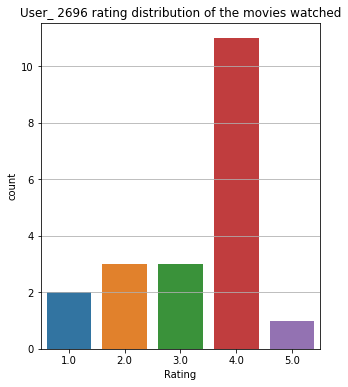

In [26]:
plt.figure(figsize = (5,6))
plt.title('User_ 2696 rating distribution of the movies watched')
plt.xlabel('Rating')
plt.grid(True)
sns.countplot(x = b, data = user_2696)

User 2696 have watched 20 movies out of which he rated 4 to most of them.

### Feature Engineering

##### Finding all the unique genres

In [27]:
df['Genres'].unique()

array(['Drama', "Animation|Children's|Musical", 'Musical|Romance',
       "Animation|Children's|Comedy", 'Action|Adventure|Comedy|Romance',
       'Action|Adventure|Drama', 'Comedy|Drama',
       "Adventure|Children's|Drama|Musical", 'Musical', 'Comedy',
       "Animation|Children's", 'Comedy|Fantasy', 'Animation',
       'Comedy|Sci-Fi', 'Drama|War', 'Romance',
       "Animation|Children's|Musical|Romance",
       "Children's|Drama|Fantasy|Sci-Fi", 'Drama|Romance',
       'Animation|Comedy|Thriller',
       "Adventure|Animation|Children's|Comedy|Musical",
       "Animation|Children's|Comedy|Musical", 'Thriller',
       'Action|Crime|Romance', 'Action|Adventure|Fantasy|Sci-Fi',
       "Children's|Comedy|Musical", 'Action|Drama|War',
       "Children's|Drama", 'Crime|Drama|Thriller', 'Action|Crime|Drama',
       'Action|Adventure|Mystery', 'Crime|Drama',
       'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Romance|Sci-Fi|War', 'Action|Thriller',
       'Action|Drama', 'Co

In [28]:
Genres_list = df.Genres.tolist()
genre_list = []
i = 0
while(i<len(Genres_list)):
    genre_list+= Genres_list[i].split('|')
    i+=1

In [29]:
unique_gen = list(set(genre_list))
print(unique_gen)
print()
print("Length of the unique Genre : ",len(unique_gen))

['Musical', 'Documentary', 'Western', 'Horror', 'Crime', 'Adventure', 'Thriller', 'Fantasy', 'Comedy', 'Film-Noir', 'Sci-Fi', "Children's", 'Action', 'War', 'Mystery', 'Animation', 'Romance', 'Drama']

Length of the unique Genre :  18


##### Creating a separate column for each genre category with a one-hot encoding ( 1 and 0)

In [30]:
new_data = pd.concat([df,df.Genres.str.get_dummies()], axis=1)
print(new_data.columns)

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [31]:
new_data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,1193,5.0,978300760.0,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1193,5.0,978298413.0,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
2,12.0,1193,4.0,978220179.0,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
3,15.0,1193,4.0,978199279.0,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
4,17.0,1193,5.0,978158471.0,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Dropping unnecessary columns
df_new = new_data.drop(['Title','Zip-code','Timestamp','Genres'],axis=1)
df_new.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,1193,5.0,F,1.0,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1193,5.0,M,56.0,16.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.0,1193,4.0,M,25.0,12.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.0,1193,4.0,M,25.0,7.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,1193,5.0,M,50.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Encoding the gender column
df_new.Gender = pd.get_dummies(df_new.Gender)

In [34]:
df_new.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,1193,5.0,1,1.0,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1193,5.0,0,56.0,16.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.0,1193,4.0,0,25.0,12.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.0,1193,4.0,0,25.0,7.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,1193,5.0,0,50.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Dropping UserID, MovieID and Rating column as they cannot be the features affecting our prediction value.

x = df_new.drop(['UserID','MovieID','Rating'],axis=1)

In [36]:
x.shape

(1000209, 21)

##### Determine the features affecting the ratings of any particular movie.

In [37]:
print('The features affecting the ratings of any particular movie:\n')
print(x.columns)

The features affecting the ratings of any particular movie:

Index(['Gender', 'Age', 'Occupation', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')


In [38]:
x.head()

,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1.0,10.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,56.0,16.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,25.0,12.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,25.0,7.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,50.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y = df_new.Rating
y.head()

0    5.0
1    5.0
2    4.0
3    4.0
4    5.0
Name: Rating, dtype: float64

In [40]:
y.shape

(1000209,)

### Develop an appropriate model to predict the movie ratings

##### Multiclass Logistic Regresion

In [41]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state = 0)

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750156, 21)
(250053, 21)
(750156,)
(250053,)


In [43]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [44]:
logReg.fit(x_train,y_train)

LogisticRegression()

In [45]:
# accuracy on training data
X_train_prediction = logReg.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("Accuracy on Training Data:",training_data_accuracy)

Accuracy on Training Data: 0.3479742880147596


In [46]:
# accuracy on test data
X_test_prediction = logReg.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print("Accuracy on Test Data:",test_data_accuracy)

Accuracy on Test Data: 0.3492459598565104


Since our Accuracy is not varying too much on training and testing data, there is no overfitting in our model.

##### Let us check our model against a few actual values

In [47]:
prediction_df = pd.DataFrame({'Test': y_test, 'Prediction': X_test_prediction})
prediction_df.head(3)

,Test,Prediction
324271,4.0,4.0
818637,4.0,4.0
148677,4.0,4.0


#### Building a Predictive System

In [48]:
x.iloc[2:3]

,Gender,Age,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2,0,25.0,12.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
input_data = x.iloc[2:3]

# changing the input_data to numpy array
import numpy as np
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logReg.predict(input_data_reshaped)

if (prediction == 5 ):
    print("\nThe Rating will be 5")
if (prediction == 4):
    print("\nThe Rating will be 4")
if (prediction == 3):
    print("\nThe Rating will be 3")
if (prediction == 2):
    print("\nThe Rating will be 2")
if (prediction == 1):
    print("\nThe Rating will be 1")


The Rating will be 4


### Develop an appropriate model to predict the movie ratings

###### Linear Regresion

In [50]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()

linReg.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred = linReg.predict(x_test)

In [52]:
print(
    'y-intercept: ',
    linReg.intercept_
)
print(
    'Beta coefficients: ',
    linReg.coef_
)
print(
    'Mean Abs Error  MAE: ',
    metrics.mean_absolute_error(y_test, y_pred)
)
print(
    'Mean Sq Error  MSE: ',
    metrics.mean_squared_error(y_test, y_pred)
)
print(
    'Root Mean Sq Error RMSE:',
    np.sqrt(metrics.mean_squared_error(y_test, y_pred))
)
print(
    'r2 value: ',
    metrics.r2_score(y_test, y_pred)
)

y-intercept:  3.3649299536177883
Beta coefficients:  [ 0.03763064  0.0039096   0.00093975 -0.09774238  0.01529116  0.35912122
 -0.31331468 -0.01332589  0.09619303  0.42257183  0.23336416  0.06256263
  0.43753011 -0.28585626  0.16279279  0.01369074 -0.00583009 -0.02301881
  0.06056241  0.29547691  0.11865333]
Mean Abs Error  MAE:  0.9022969746382011
Mean Sq Error  MSE:  1.2044337150706068
Root Mean Sq Error RMSE: 1.0974669539765682
r2 value:  0.03774127759135082


In [53]:
prediction_df = pd.DataFrame({'Test': y_test, 'Prediction': y_pred})
prediction_df.head(3)

,Test,Prediction
324271,4.0,3.400159
818637,4.0,3.712010
148677,4.0,3.538813
